<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Optional:--Explore-Dataset" data-toc-modified-id="Optional:--Explore-Dataset-0.1"><span class="toc-item-num">0.1&nbsp;&nbsp;</span>Optional:  Explore Dataset</a></span></li></ul></li><li><span><a href="#restricted-boltzmann-machine" data-toc-modified-id="restricted-boltzmann-machine-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>restricted boltzmann machine</a></span><ul class="toc-item"><li><span><a href="#Vary-epochs" data-toc-modified-id="Vary-epochs-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Vary epochs</a></span></li><li><span><a href="#Probability-Input" data-toc-modified-id="Probability-Input-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Probability Input</a></span></li><li><span><a href="#Vary-hidden-layer-size" data-toc-modified-id="Vary-hidden-layer-size-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Vary hidden layer size</a></span></li><li><span><a href="#Examinate-Outcome" data-toc-modified-id="Examinate-Outcome-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Examinate Outcome</a></span></li></ul></li><li><span><a href="#deep--belief-net" data-toc-modified-id="deep--belief-net-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>deep- belief net</a></span><ul class="toc-item"><li><span><a href="#Two-stack-RBM" data-toc-modified-id="Two-stack-RBM-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Two stack RBM</a></span></li><li><span><a href="#Recognition-with-three-layer-architecture" data-toc-modified-id="Recognition-with-three-layer-architecture-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Recognition with three layer architecture</a></span></li><li><span><a href="#Generative-Model" data-toc-modified-id="Generative-Model-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Generative Model</a></span></li></ul></li><li><span><a href="#fine-tune-wake-sleep-training" data-toc-modified-id="fine-tune-wake-sleep-training-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>fine-tune wake-sleep training</a></span><ul class="toc-item"><li><span><a href="#Fine-Tuning-with-wake-sleep" data-toc-modified-id="Fine-Tuning-with-wake-sleep-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Fine Tuning with wake sleep</a></span></li><li><span><a href="#Simpler-network" data-toc-modified-id="Simpler-network-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Simpler network</a></span></li></ul></li></ul></div>

**Imports**

In [7]:
# Re-import packages if they change
%load_ext autoreload
%autoreload 2

import struct
import matplotlib.animation as animation

import matplotlib.pyplot as plt 
import tqdm
import matplotlib.image as mpimg 
from datetime import date, datetime

from util import *
from rbm import RestrictedBoltzmannMachine 
from dbn import DeepBeliefNet
from simple_dbn import Simple_DeepBeliefNet

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


**Declare image-size and load dataset**

In [4]:
image_size = [28,28]
train_imgs,train_lbls,test_imgs,test_lbls = read_mnist(dim=image_size, n_train=60000, n_test=10000)

### Optional:  Explore Dataset

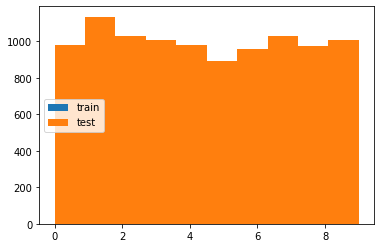

In [16]:
# Distribution of Classes in training and test 
plt.hist(np.where(train_lbls == 1)[1], label='train')
plt.hist(np.where(test_lbls == 1)[1], label='test')
plt.legend(loc = 'center left')

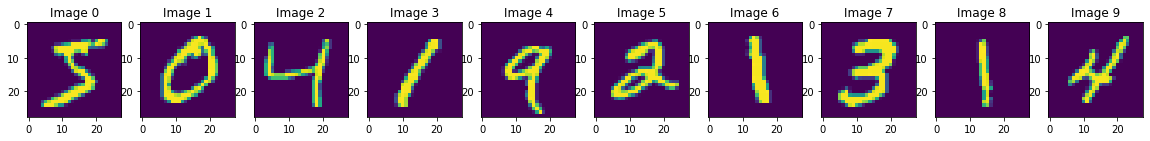

In [4]:
#Vizualising random images
fig, axs = plt.subplots(1,10, figsize=(20,20))
for i in range(10):
    axs[i].set_title('Image {:d}'.format(i))
    axs[i].imshow(train_imgs[i].reshape((28,28)))
plt.show()

In [5]:
# Image shape
print("Image shape: ", train_imgs[0].shape)
print("Max Image value: ", np.max(train_imgs))
print("Min Image value: ", np.min(train_imgs))
# print('Unique Image values: ', np.unique(train_imgs))  # Input not only zero and 1
print("Number of training samples: ", train_imgs.shape[0])
print("Number of test samples: ", test_imgs.shape[0])

Image shape:  (784,)
Max Image value:  1.0
Min Image value:  0.0
Number of training samples:  60000
Number of test samples:  10000


In [6]:
label = 8
idx = np.where(np.where(train_lbls == 1)[1] == label)
idx_label = np.where(train_lbls == 1)[0][idx]
idx_label

array([   17,    31,    41, ..., 59989, 59995, 59999])

## restricted boltzmann machine

<div class="alert alert-note">
<b>Task: </b> 
Implement an RBM for recognisisng MNIST images
   
* with binary stochatic units
* train with a contrastive divergence algorithm $CD_1$
* start with 500 units
</div>

<div class="alert alert-success">
<b>Vary number of epochs</b>
    
* loss starts quite high with 33-6 
* converges to around 1.9
* doesn't change anymore after 2-8 epochs

<b>Compare binary input and probability input</b>
    
* a little bit higher with probabilities, but pretty similar

<b>Effect of hidden layer size</b>
    
* with 200 units loss starts higher with 33, but decrease also to 2.1
* loss decreases till 5.3 

<b>Examine outcomes</b>

* rf contain a combination of images
* rf doesn't change anymore after 10 epochs
* with more units more rf are completly white -> not all units are needed

</div>

<div class="alert alert-danger">
<b>Questions</b> 

* Why is there a += in the delta parameter in the update method
</div>

### Vary epochs


Starting a Restricted Boltzmann Machine..
Trained for 60000 iterations
learning CD1


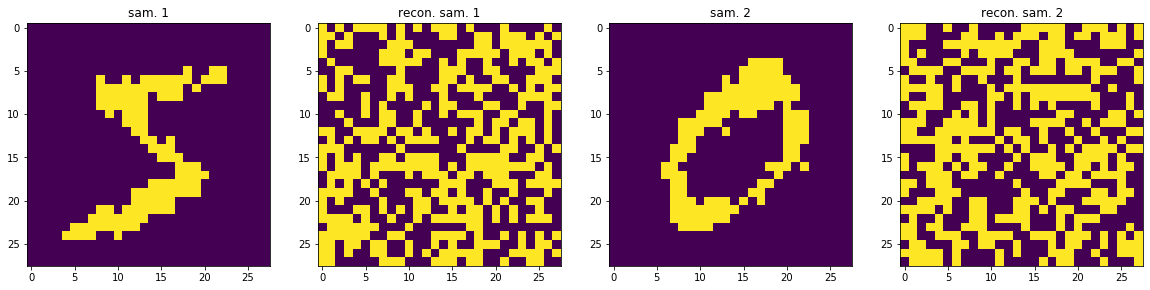

iteration=      0 recon_loss=6.7519


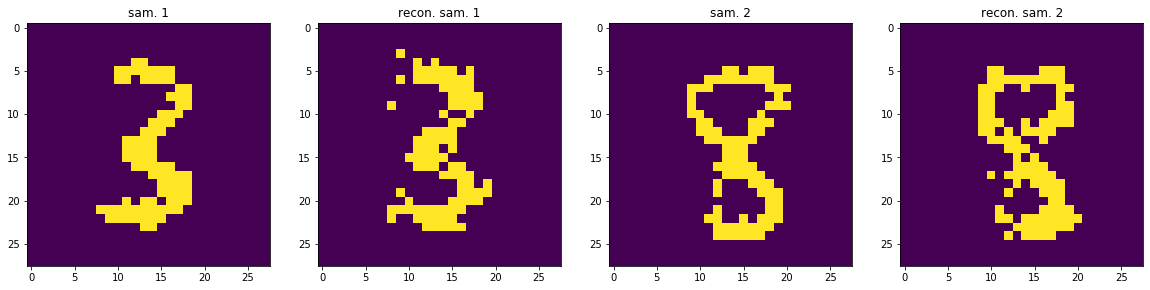

iteration=   5000 recon_loss=2.1795


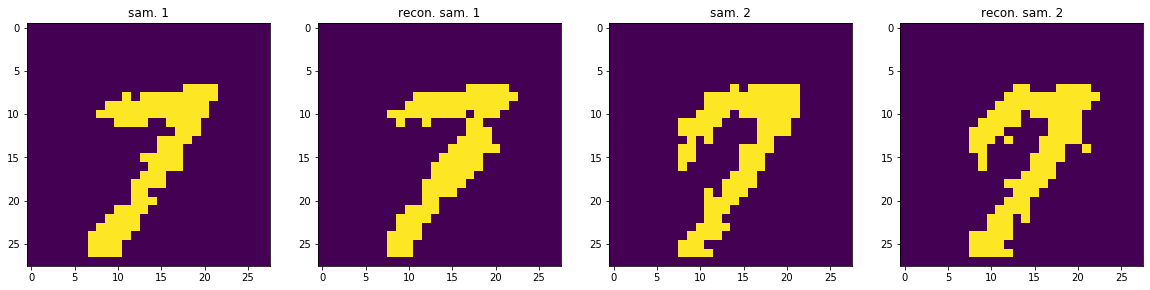

iteration=  10000 recon_loss=2.0851


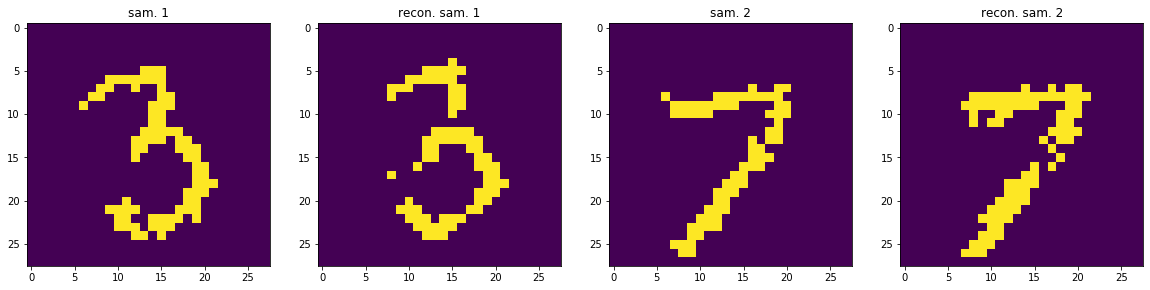

iteration=  15000 recon_loss=2.0959


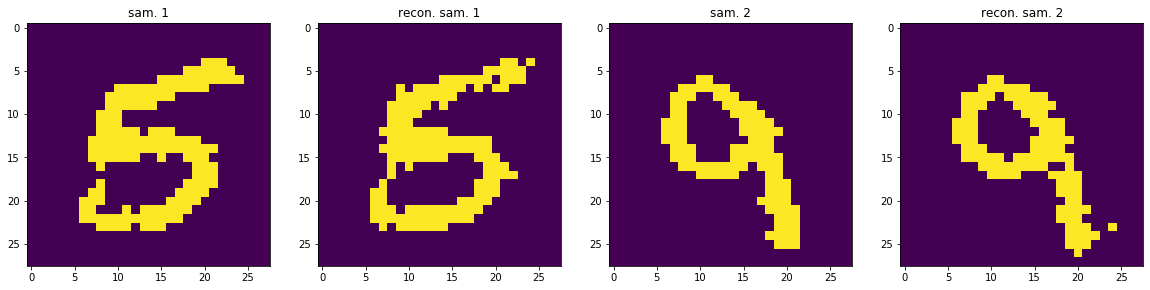

iteration=  20000 recon_loss=2.0363


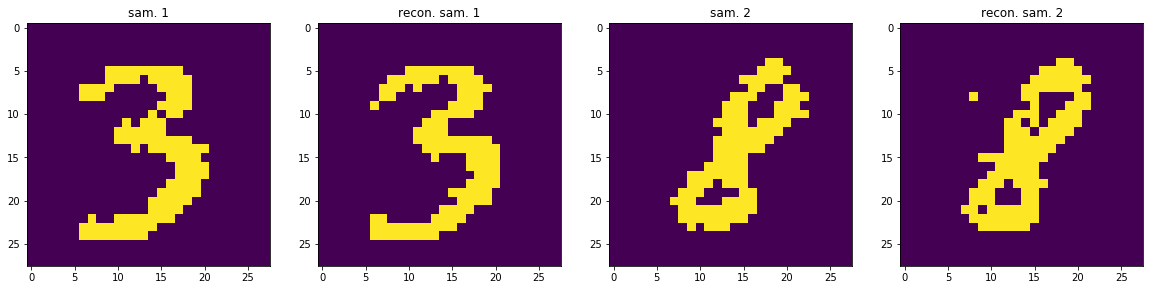

iteration=  25000 recon_loss=2.0290


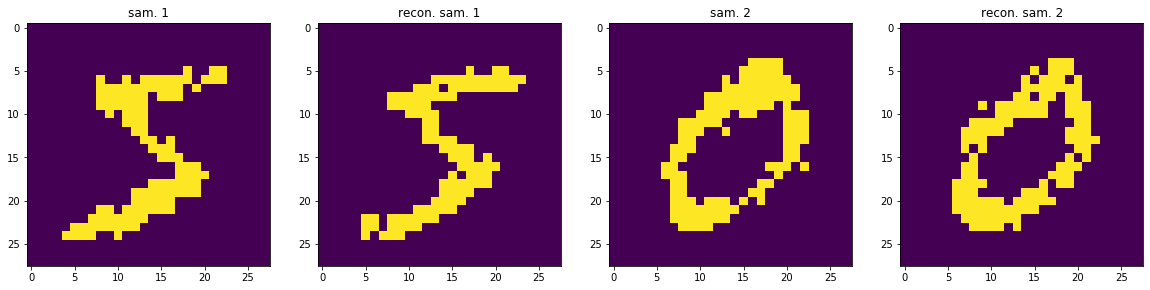

iteration=  30000 recon_loss=2.0790


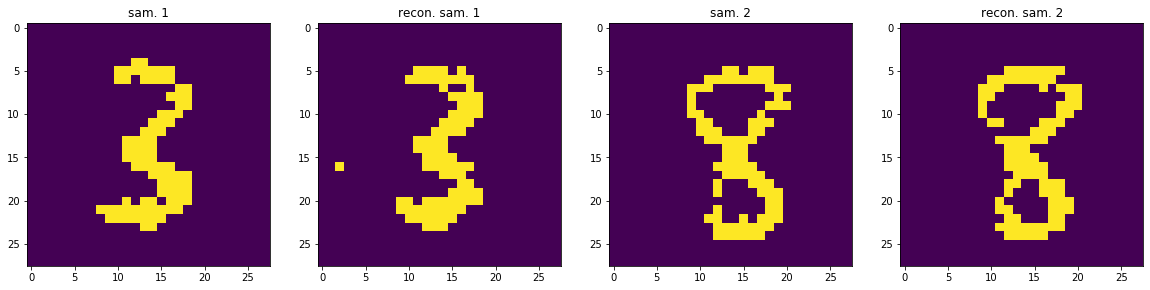

iteration=  35000 recon_loss=2.0652


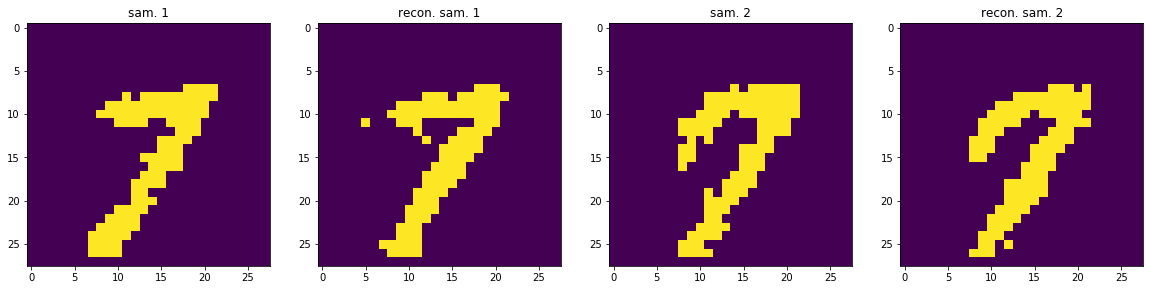

iteration=  40000 recon_loss=2.0636


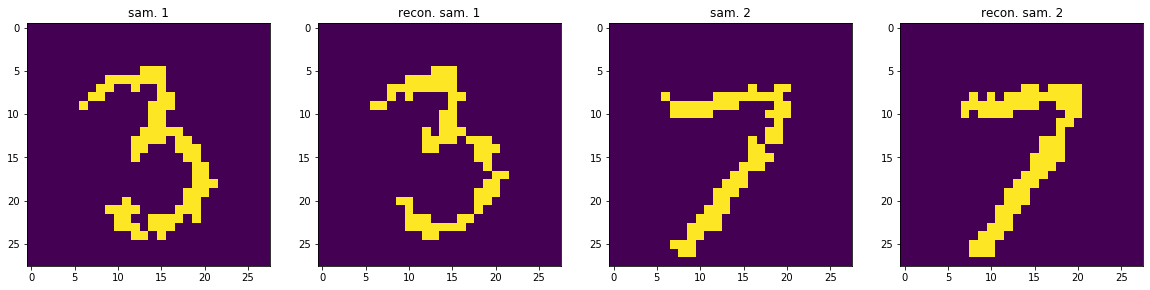

iteration=  45000 recon_loss=2.0431


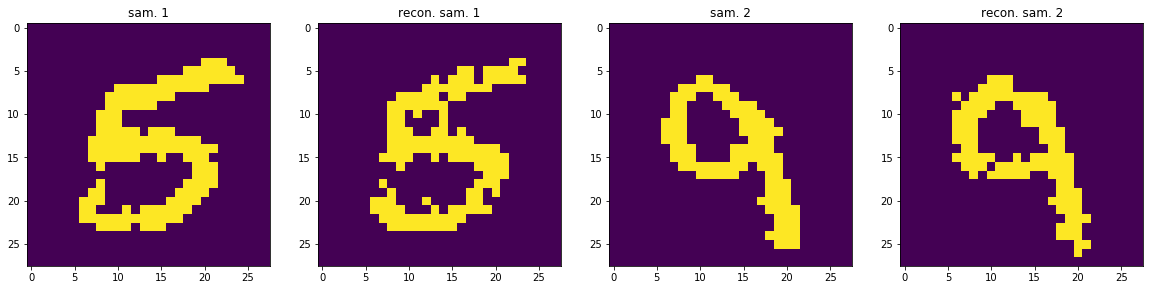

iteration=  50000 recon_loss=2.0037


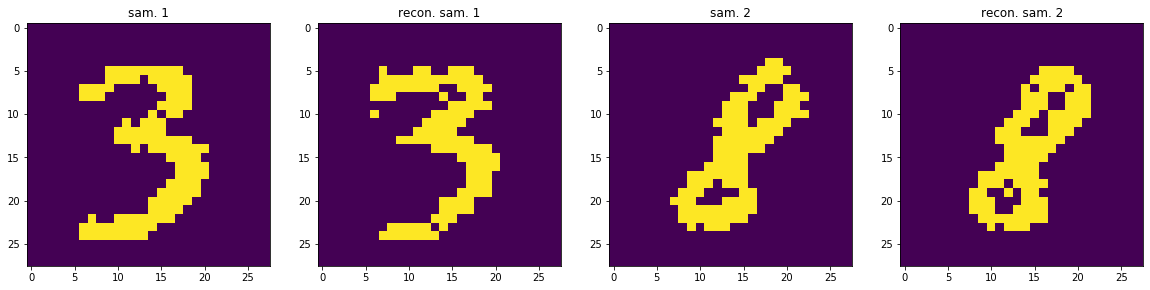

iteration=  55000 recon_loss=1.9740


Starting a Restricted Boltzmann Machine..
Trained for 90000 iterations
learning CD1


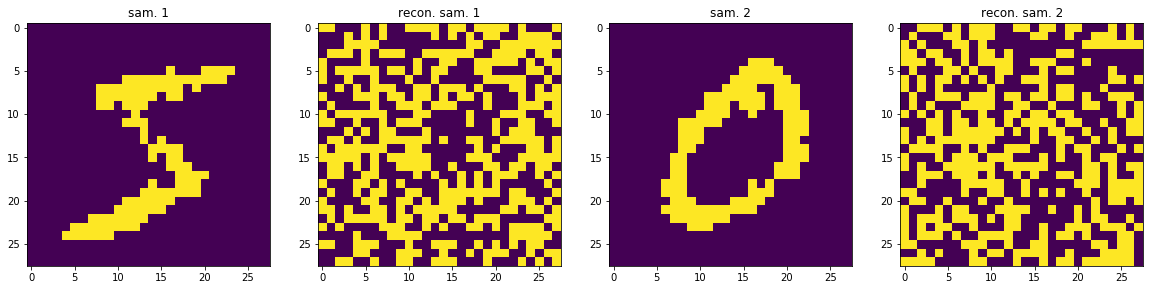

iteration=      0 recon_loss=6.5608


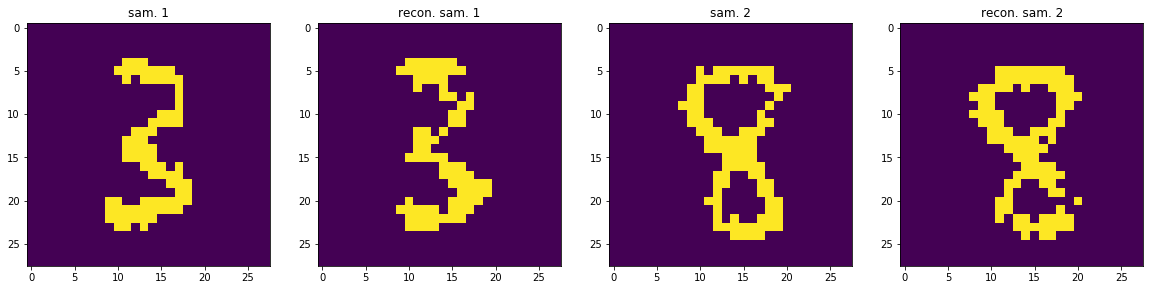

iteration=   5000 recon_loss=2.2055


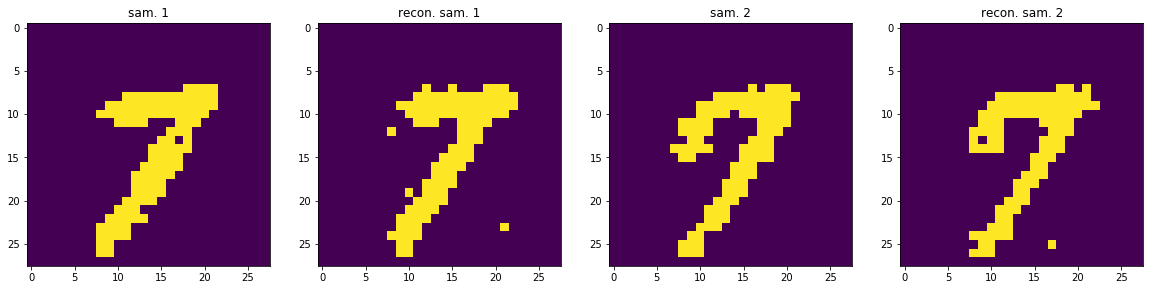

iteration=  10000 recon_loss=2.0879


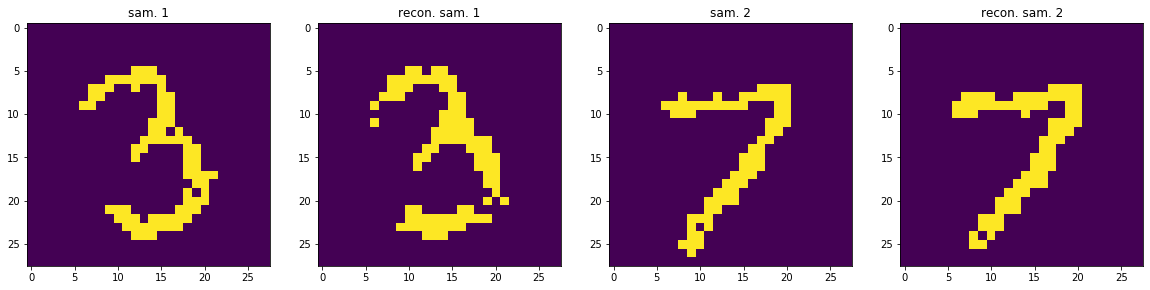

iteration=  15000 recon_loss=2.1215


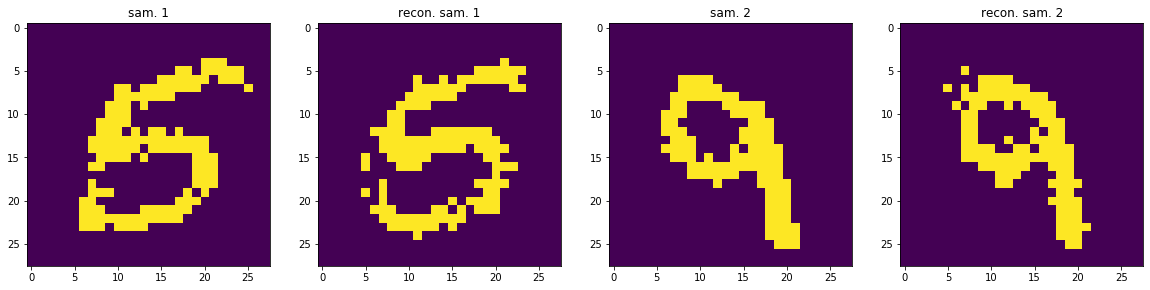

iteration=  20000 recon_loss=2.0577


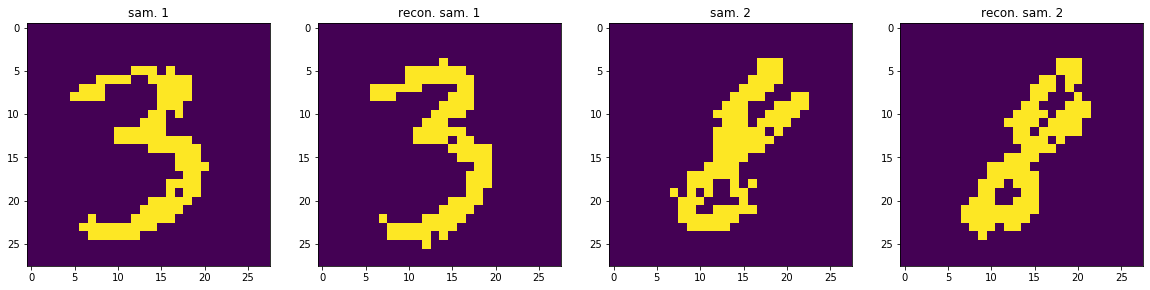

iteration=  25000 recon_loss=2.0507


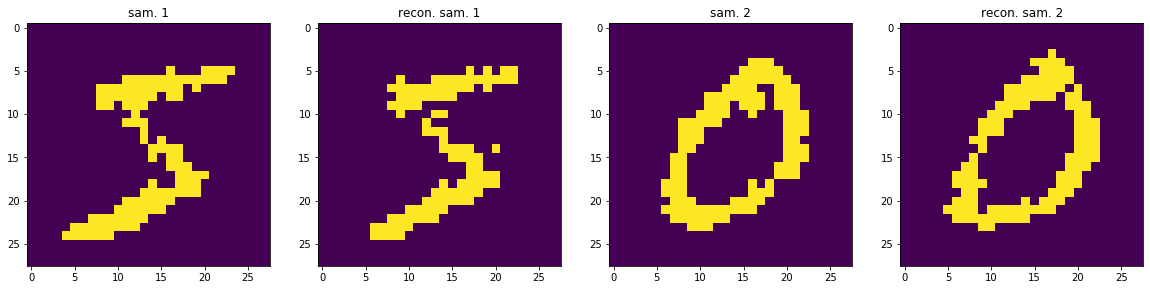

iteration=  30000 recon_loss=2.1230


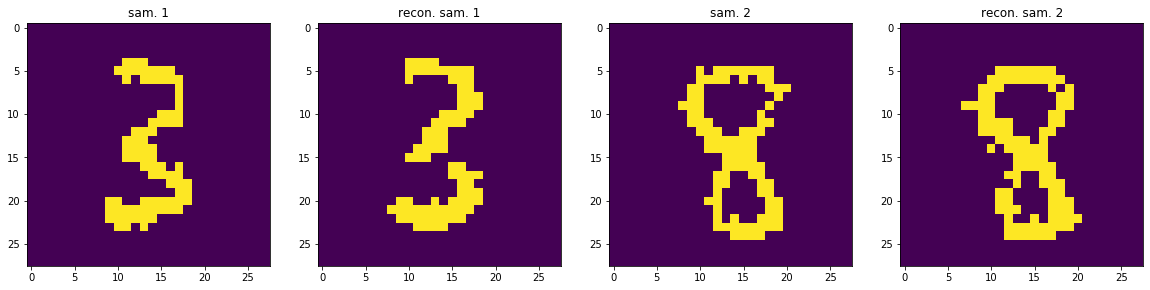

iteration=  35000 recon_loss=2.1002


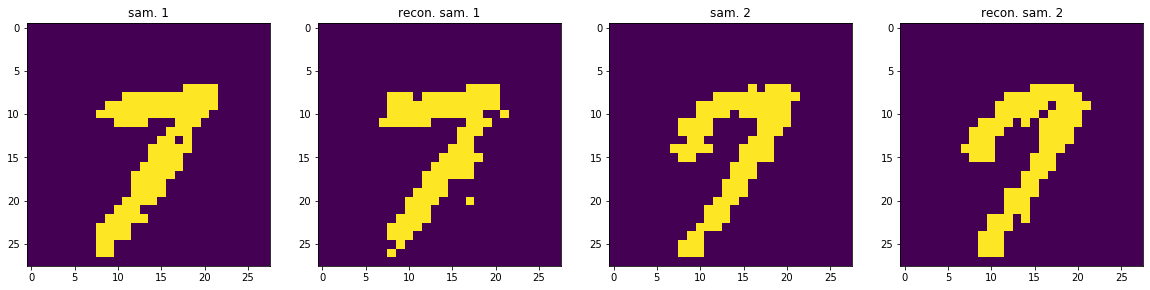

iteration=  40000 recon_loss=2.0295


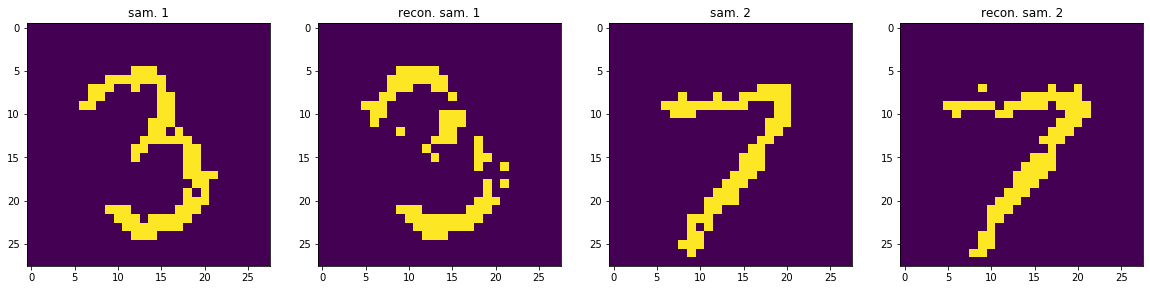

iteration=  45000 recon_loss=2.0716


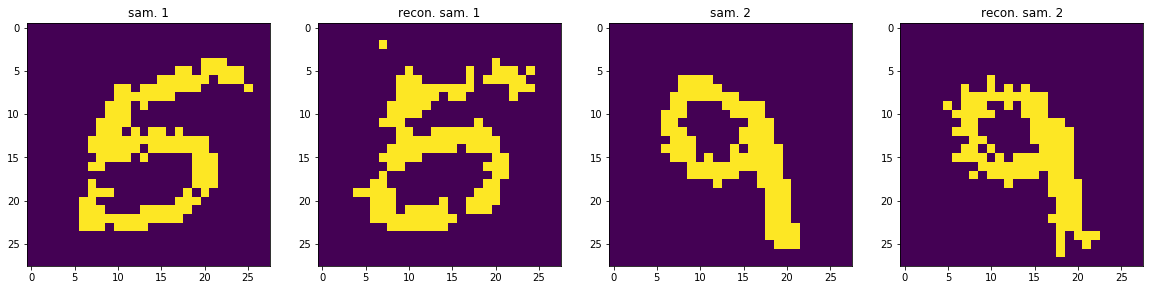

iteration=  50000 recon_loss=2.0606


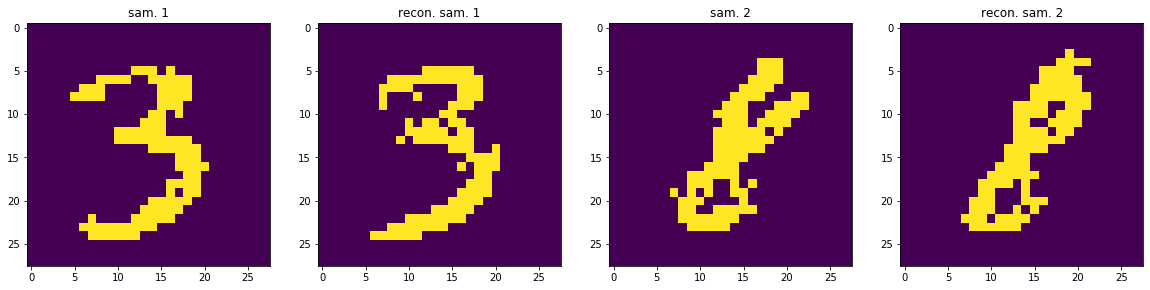

iteration=  55000 recon_loss=2.0263


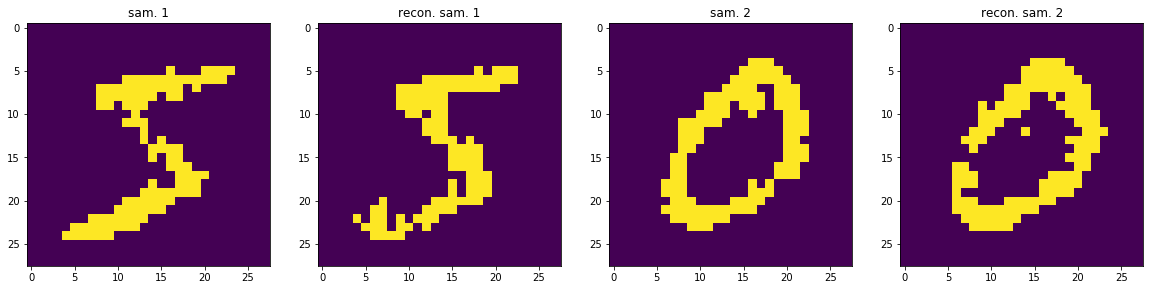

iteration=  60000 recon_loss=2.0778


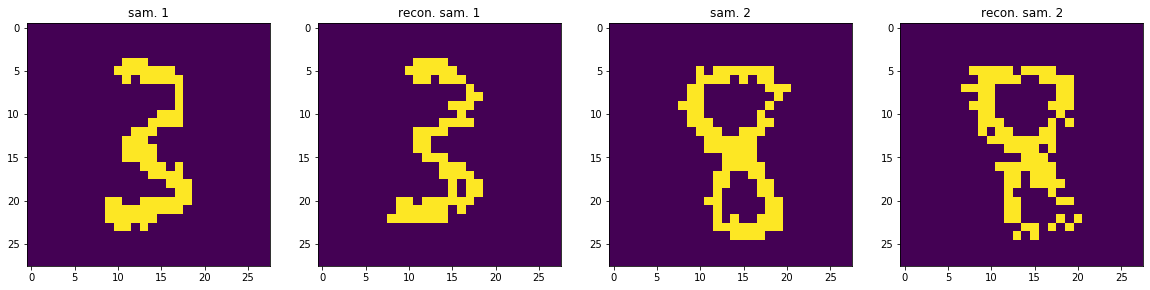

iteration=  65000 recon_loss=2.0254


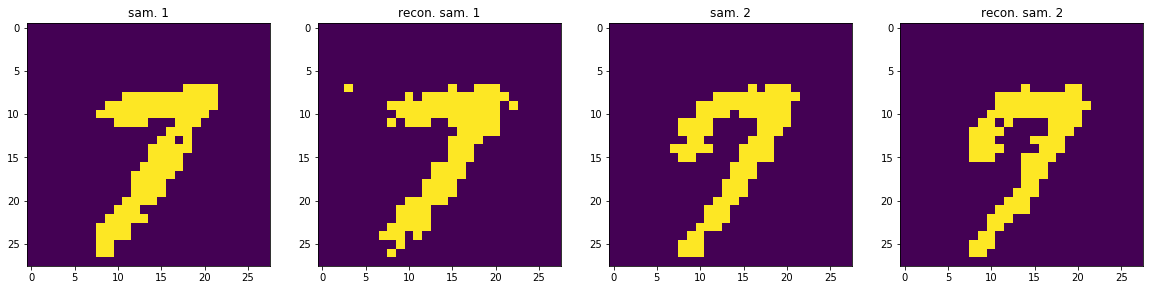

iteration=  70000 recon_loss=2.0131


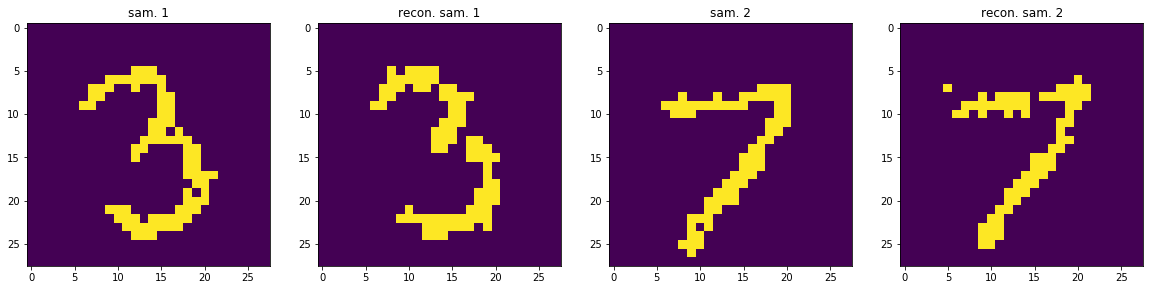

iteration=  75000 recon_loss=2.0356


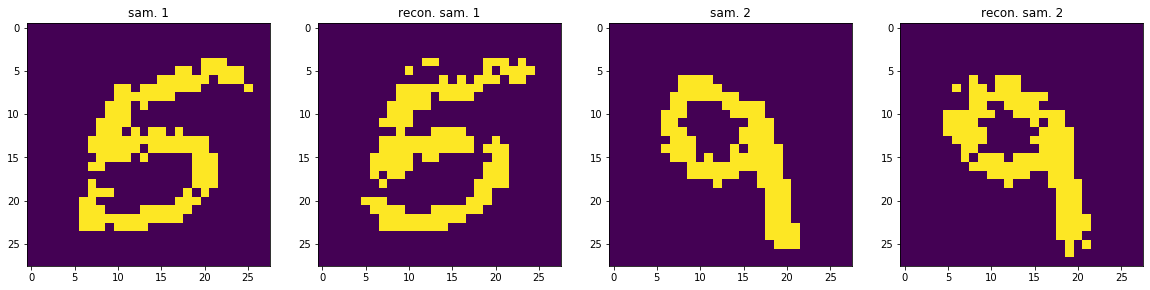

iteration=  80000 recon_loss=2.0146


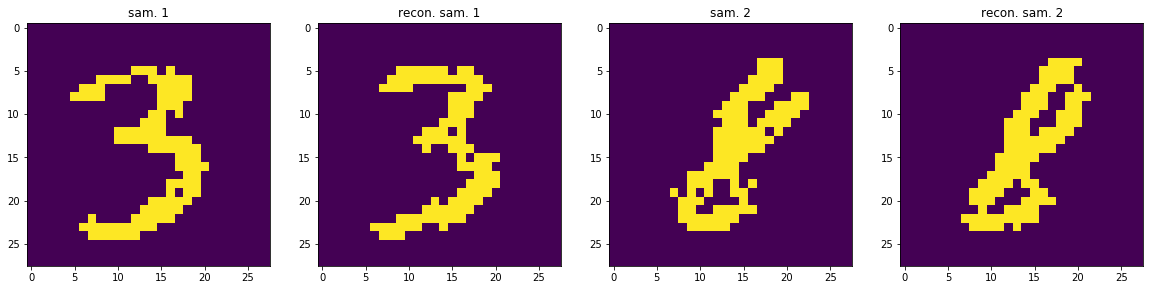

iteration=  85000 recon_loss=2.0468



In [7]:
batch_size = 10
epochs = np.arange(10, 20, 5)
#n_iterations_basic = int(train_imgs.shape[0] / batch_size * i)
for i in epochs:
    print("\nStarting a Restricted Boltzmann Machine..")
    # Changed from 10
    rbm = RestrictedBoltzmannMachine(
        ndim_visible=image_size[0] * image_size[1],
        ndim_hidden=500,
        is_bottom=True,
        image_size=image_size,
        is_top=False,
        n_labels=10,
        batch_size=batch_size,
    )
    # each epoch corresponds to a full swipe through a training set divided into mini-batches
    n_iterations = int(train_imgs.shape[0] / batch_size * i)
    print("Trained for {:d} iterations".format(n_iterations))
    rbm.cd1(visible_trainset=train_imgs, n_iterations=n_iterations)

### Probability Input

In [9]:
print("\nStarting a Restricted Boltzmann Machine..")
exp_time = datetime.now().strftime('%Y-%m-%d_%H-%M-%S')
print("Results saved in folder: ",exp_time )
os.makedirs(exp_time)

rbm = RestrictedBoltzmannMachine(
        ndim_visible=image_size[0] * image_size[1],
        ndim_hidden=500,
        is_bottom=True,
        image_size=image_size,
        is_top=False,
        n_labels=10,
        batch_size=batch_size,
    )
n_iterations = 30000
print("Trained for {:d} iterations".format(n_iterations))
rbm.cd1(visible_trainset=train_imgs, n_iterations=n_iterations, binary_vis=False, img_dir=exp_time)


Starting a Restricted Boltzmann Machine..
Results saved in folder:  2020-02-22_17-46-20
Trained for 30000 iterations
learning CD1


iteration=      0 recon_loss=6.5733
iteration=   5000 recon_loss=2.2568
iteration=  10000 recon_loss=2.3229
iteration=  15000 recon_loss=2.2089
iteration=  20000 recon_loss=2.2081
iteration=  25000 recon_loss=2.1660



### Vary hidden layer size

In [11]:
batch_size = 10
ndims_hidden = np.arange(200, 501, 100)
n_iterations = 60000
for ndim_hidden in ndims_hidden:
    exp_time = datetime.now().strftime('%Y-%m-%d_%H-%M-%S')
    print("Results saved in folder: ",exp_time )
    os.makedirs(exp_time)

    print("\nStarting a Restricted Boltzmann Machine..")
    # Changed from 10
    rbm = RestrictedBoltzmannMachine(
        ndim_visible=image_size[0] * image_size[1],
        ndim_hidden=ndim_hidden,
        is_bottom=True,
        image_size=image_size,
        is_top=False,
        n_labels=10,
        batch_size=batch_size,
    )
    # each epoch corresponds to a full swipe through a training set divided into mini-batches
    print("Trained for {:d} iterations".format(n_iterations))
    rbm.cd1(visible_trainset=train_imgs, n_iterations=n_iterations, img_dir=exp_time)

Results saved in folder:  2020-02-22_17-58-04

Starting a Restricted Boltzmann Machine..
Trained for 60000 iterations
learning CD1


iteration=      0 recon_loss=34.9461
iteration=   5000 recon_loss=2.3638
iteration=  10000 recon_loss=2.2758
iteration=  15000 recon_loss=2.1634
iteration=  20000 recon_loss=2.1548


KeyboardInterrupt: 

### Examinate Outcome


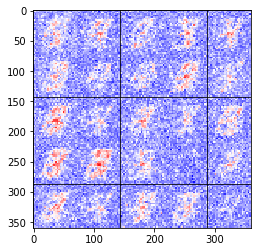

In [12]:
# Read Images 
img = mpimg.imread('rf.iter000000.png')  
plt.imshow(img)

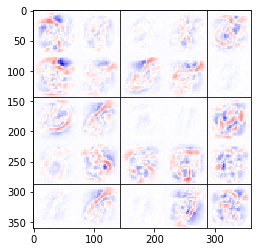

In [15]:
img = mpimg.imread('rf.iter005000.png')  
plt.imshow(img)

## deep- belief net

<div class="alert alert-note">
<b>Task: </b> 
Implement a deep networ with greedy layer-wise pretraining
   
* extend the network to a "deeper" architecture
* examine the generalisation performance
* hidden layer of the last RBM are concatenated with the hidden layer 
* bi-directional connection layer is added to perform Gibbs sampling 
</div>

<div class="alert alert-success">
<b>Two stack RBM</b> (784-500-500)
    
* reconstruction losses for first layer still at 2 
* loss for second layer smaller (around 1)

<b>Recognition with three layer network</b> (784-500-500+10-2000)
    
* accuracy up to 83.95% with k = 15
* with lower k already we reach even better results of 84 (k=2)

<b>Generation with three layer network</b> (784-500-500+10-2000)
    
* images can't always be generated
* dpends on the initialization of the hidden units layer

</div>

### Two stack RBM

In [3]:
print ("\nStarting a Deep Belief Net..")
n_iterations = 30000
dbn = DeepBeliefNet(sizes={"vis":image_size[0]*image_size[1], "hid":500, "pen":500, "top":2000, "lbl":10},
                    image_size=image_size,
                    n_labels=10,
                    batch_size=10
)
exp_time = datetime.now().strftime('%Y-%m-%d_%H-%M-%S')
dbn.train_greedylayerwise(
    vis_trainset=train_imgs, 
    lbl_trainset=train_lbls, 
    n_iterations=n_iterations, 
    train_top_layer=False, 
    img_dir='two-stack/%s'%exp_time
)


Starting a Deep Belief Net..
loaded rbm[vis--hid] from trained_rbm
loaded rbm[hid--pen] from trained_rbm


### Recognition with three layer architecture

In [4]:
dbn.train_greedylayerwise(
    vis_trainset=train_imgs, 
    lbl_trainset=train_lbls, 
    n_iterations=n_iterations, 
    train_top_layer=True, 
    img_dir='two-stack/%s'%exp_time
)

loaded rbm[vis--hid] from trained_rbm
loaded rbm[hid--pen] from trained_rbm
loaded rbm[pen+lbl--top] from trained_rbm


In [10]:
#After one Gibbs step
dbn.recognize(train_imgs, train_lbls, k=1)


accuracy = 83.89%


In [11]:
# After 15 Gibbs steps
dbn.recognize(train_imgs, train_lbls)


accuracy = 83.95%


### Generative Model

0


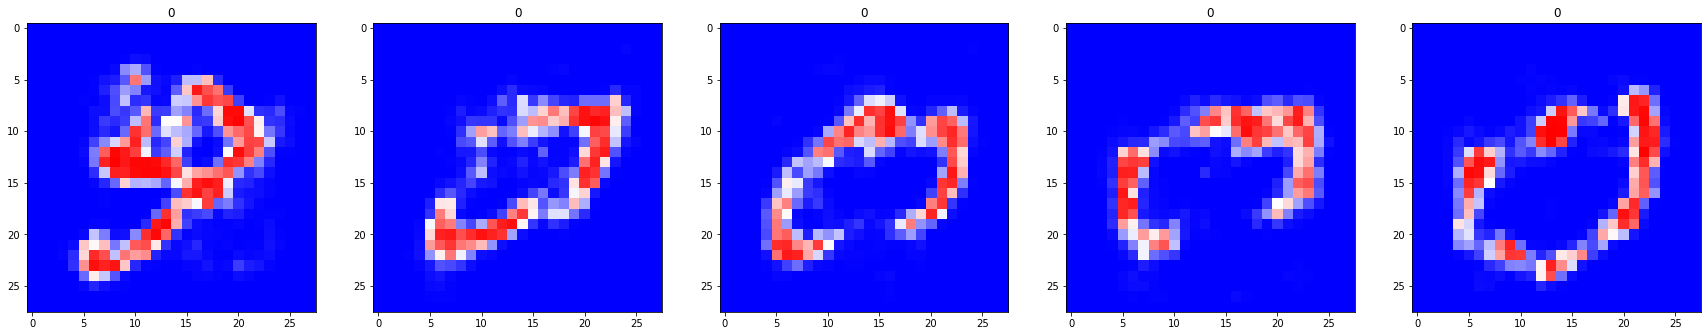

1


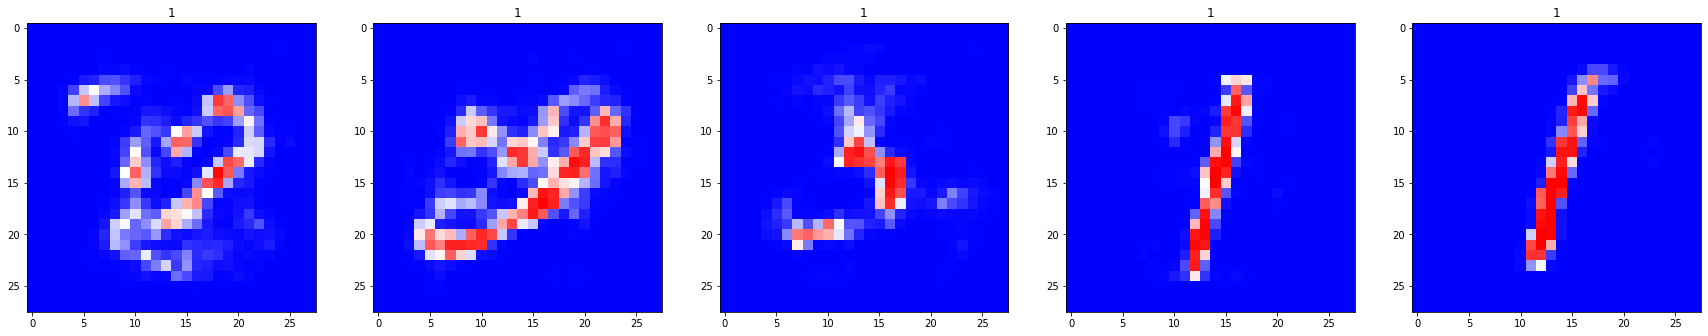

2


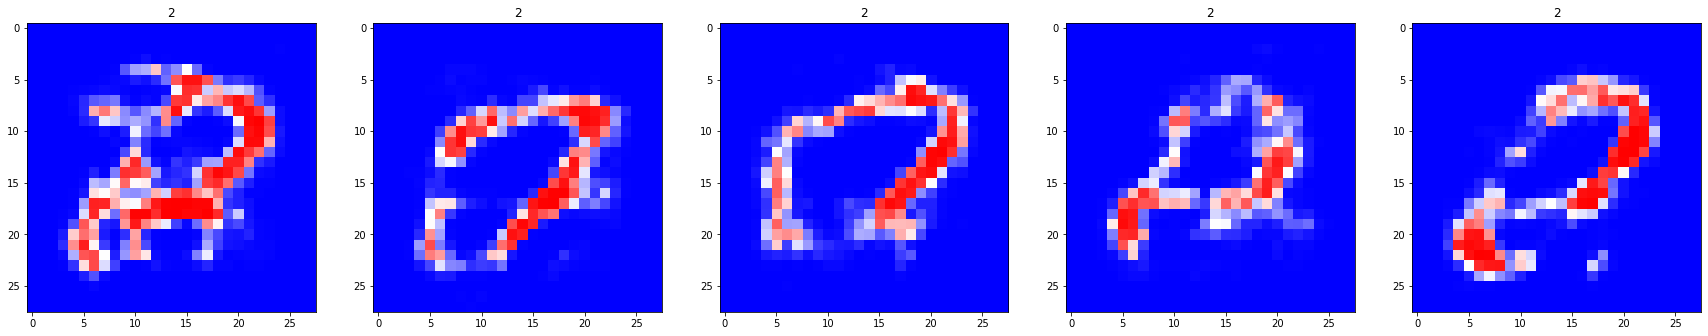

3


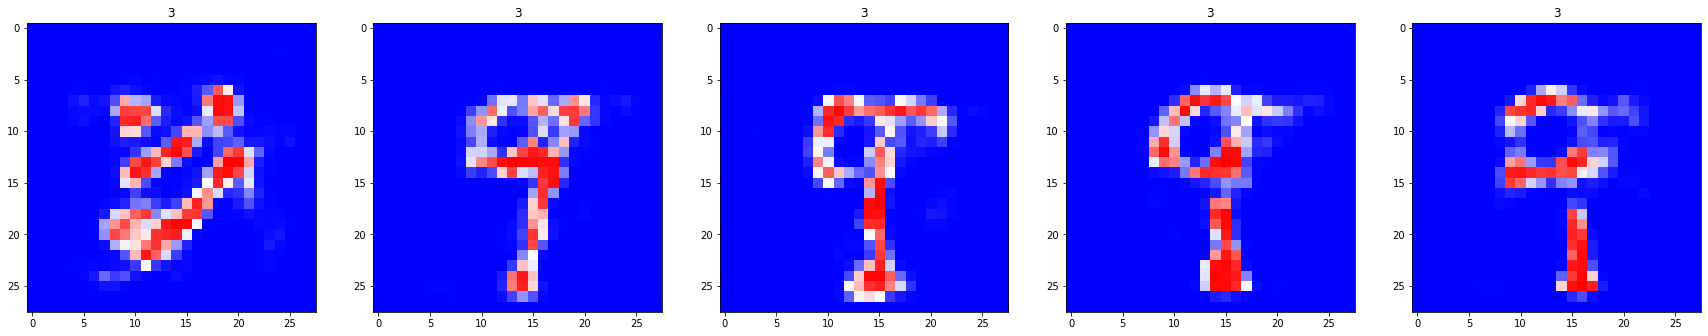

4


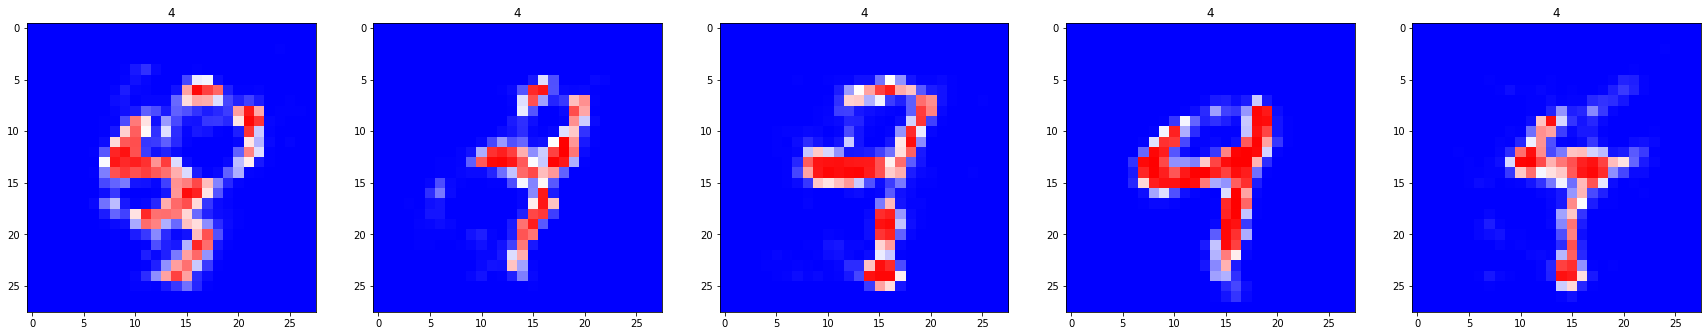

5


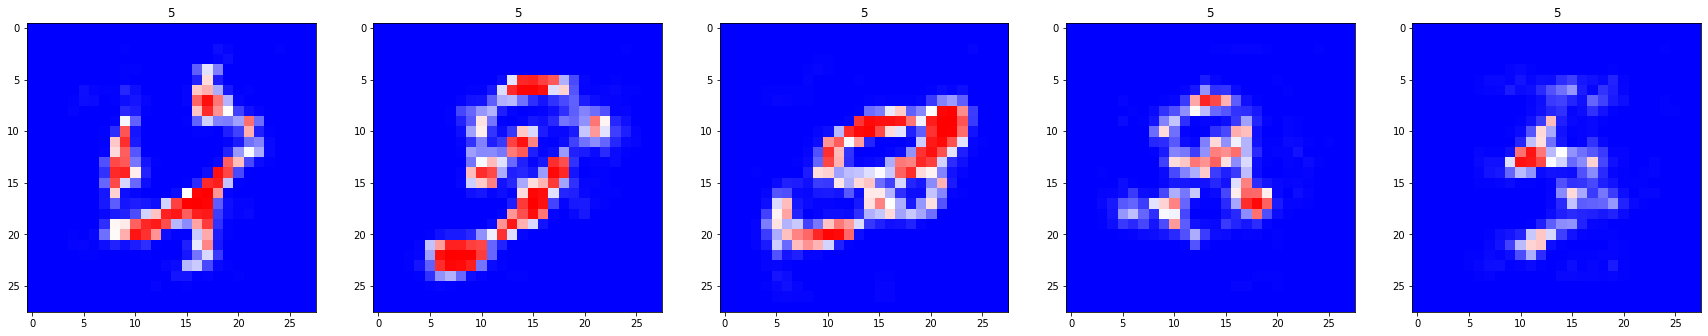

6


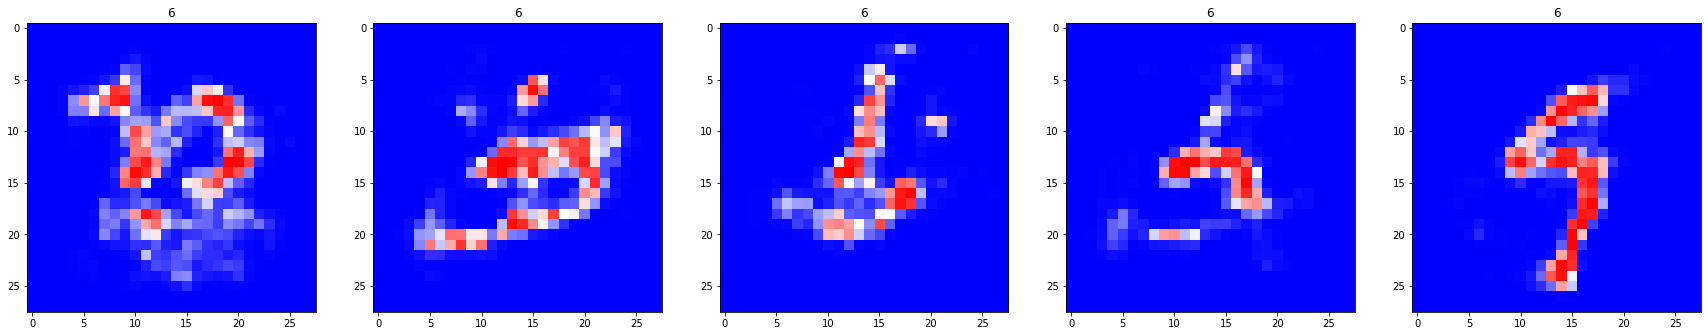

7


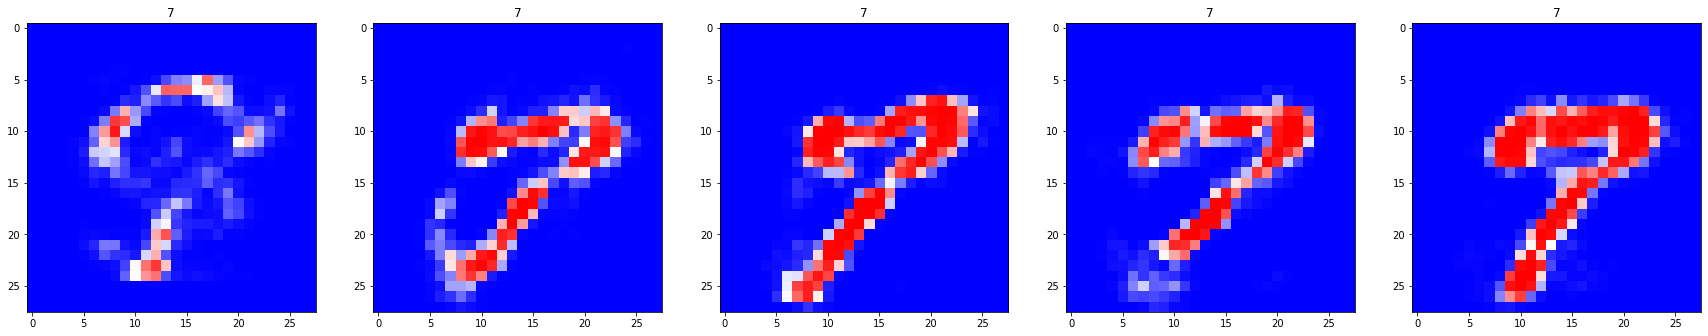

8


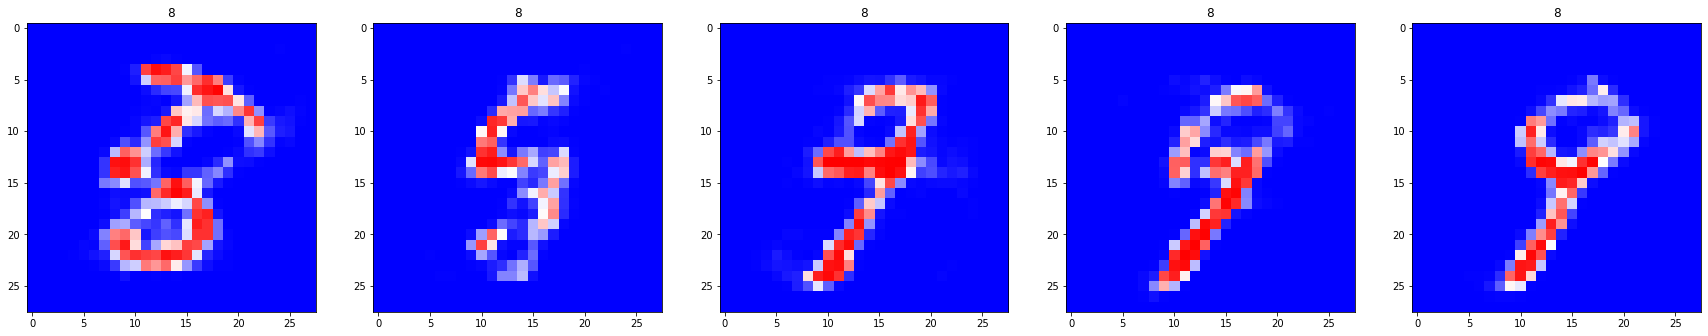

9


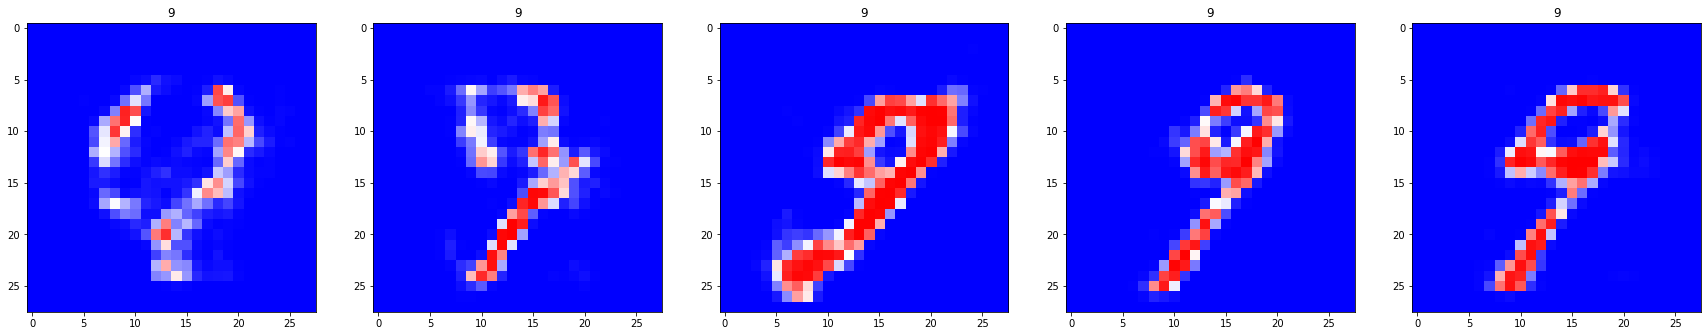

In [39]:
for digit in range(10):
    print(digit)
    digit_1hot = np.zeros(shape=(1,10))
    digit_1hot[0,digit] = 1
    dbn.generate(digit_1hot, name="dbn")

## fine-tune wake-sleep training

<div class="alert alert-note">
<b>Task: </b> 
Implement a deep networ with greedy layer-wise pretraining
   
* improve the classification performance by fine-tuning the DBM
* use supervised learning approach based on wake-sleep
* compare simpler dbn with the one used all the time  
</div>

### Fine Tuning with wake sleep 

<div class="alert alert-success">
<b>Fine Tune with wake-sleep algorithm</b>
    
* ...
* ...

<b>Simpler Network</b>
    
* ...
* ...


</div>

In [16]:
print ("\nStarting a Deep Belief Net..")
n_iterations = 30000
dbn = DeepBeliefNet(sizes={"vis":image_size[0]*image_size[1], "hid":500, "pen":500, "top":2000, "lbl":10},
                    image_size=image_size,
                    n_labels=10,
                    batch_size=20
)
exp_time = datetime.now().strftime('%Y-%m-%d_%H-%M-%S')
dbn.train_greedylayerwise(
    vis_trainset=train_imgs, 
    lbl_trainset=train_lbls, 
    n_iterations=n_iterations, 
    train_top_layer=True, 
    img_dir='two-stack/%s'%exp_time
)


Starting a Deep Belief Net..
training vis--hid
learning CD1


iteration=      0 recon_loss=63.6682
iteration=   5000 recon_loss=3.8988
iteration=  10000 recon_loss=3.3288
iteration=  15000 recon_loss=2.8872
iteration=  20000 recon_loss=2.6177
iteration=  25000 recon_loss=2.4192

training hid--pen
learning CD1


iteration=      0 recon_loss=46.2835
iteration=   5000 recon_loss=3.1156
iteration=  10000 recon_loss=2.8867
iteration=  15000 recon_loss=2.7677
iteration=  20000 recon_loss=2.7290
iteration=  25000 recon_loss=2.7369

training pen+lbl--top
learning CD1


iteration=      0 recon_loss=10.5443
iteration=   5000 recon_loss=2.3506
iteration=  10000 recon_loss=2.2052
iteration=  15000 recon_loss=2.1497
iteration=  20000 recon_loss=2.1317
iteration=  25000 recon_loss=2.1344



In [17]:
dbn.recognize(train_imgs, train_lbls, k = 1)
dbn.recognize(train_imgs, train_lbls, k = 15)
dbn.recognize(test_imgs, test_lbls) 
# check change to probabilities


accuracy = 90.22%



accuracy = 89.83%



accuracy = 89.89%


In [18]:
dbn.train_wakesleep_finetune(vis_trainset=train_imgs, lbl_trainset=train_lbls, n_iterations=2000)


training wake-sleep..


In [19]:
dbn.recognize(train_imgs, train_lbls, k = 1)
dbn.recognize(train_imgs, train_lbls, k = 15)
dbn.recognize(test_imgs, test_lbls) 
# check change to probabilities


accuracy = 89.62%



accuracy = 89.60%



accuracy = 90.16%


0


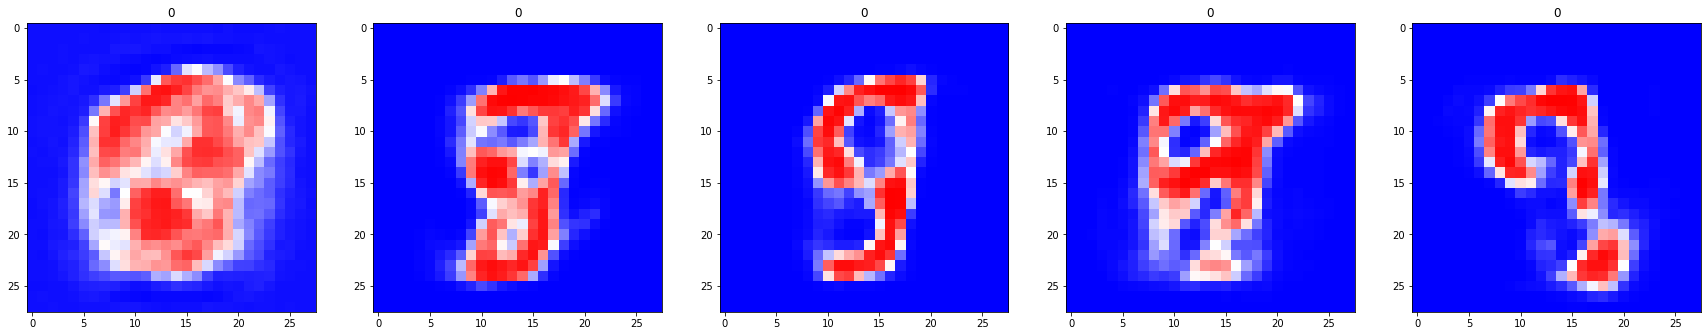

1


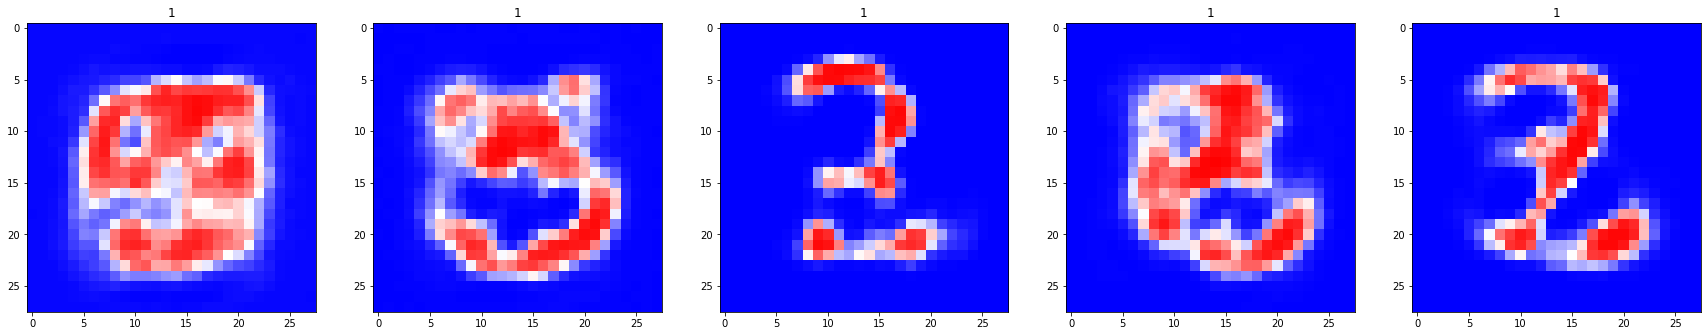

2


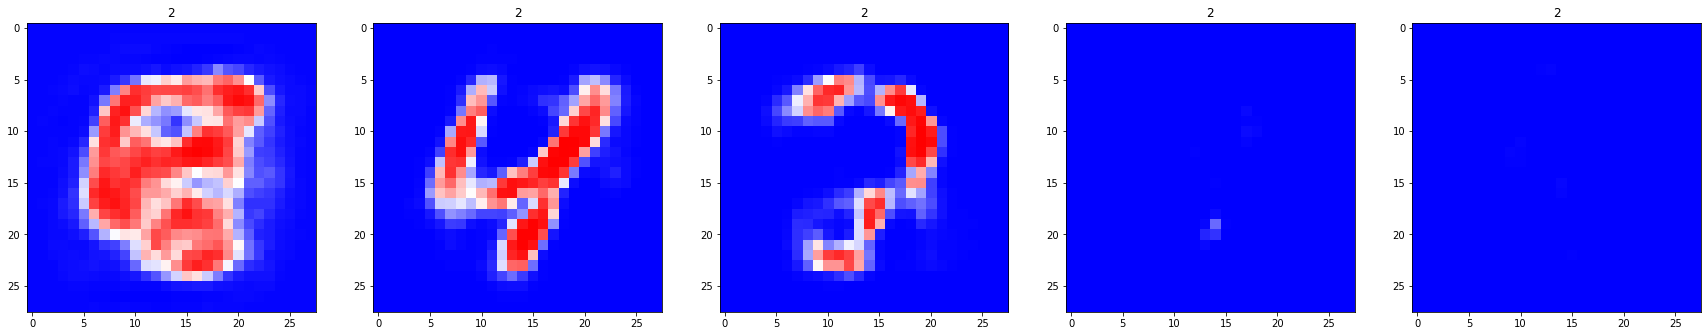

3


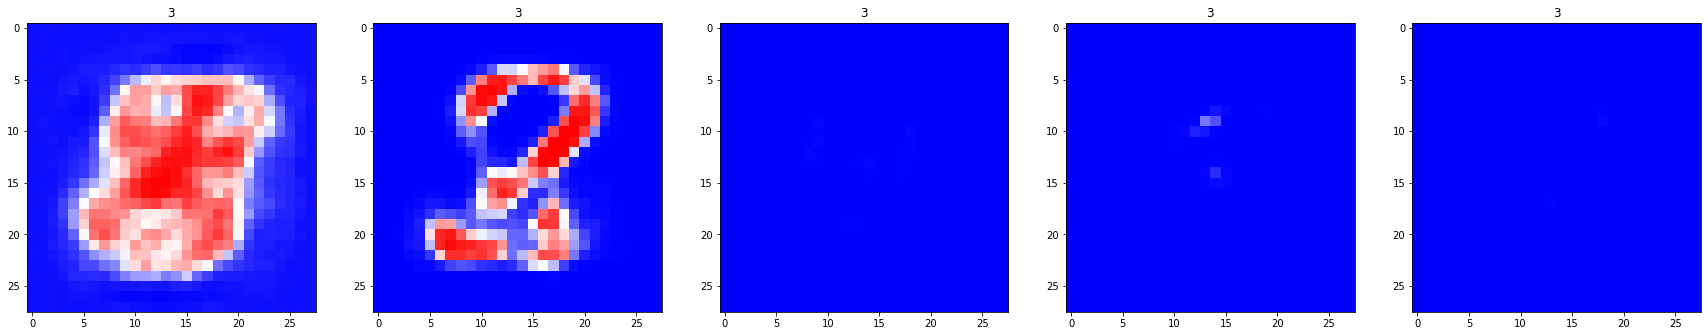

4


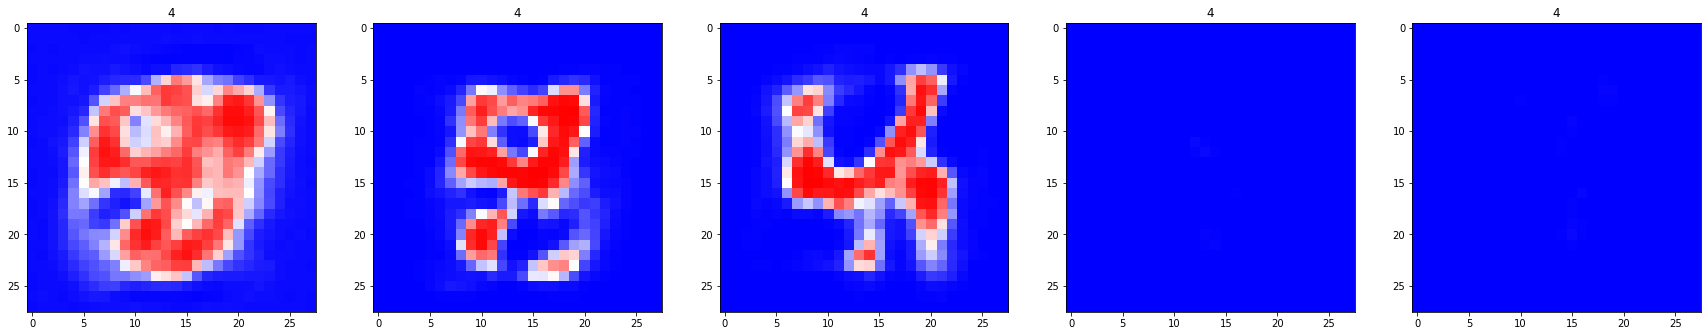

5


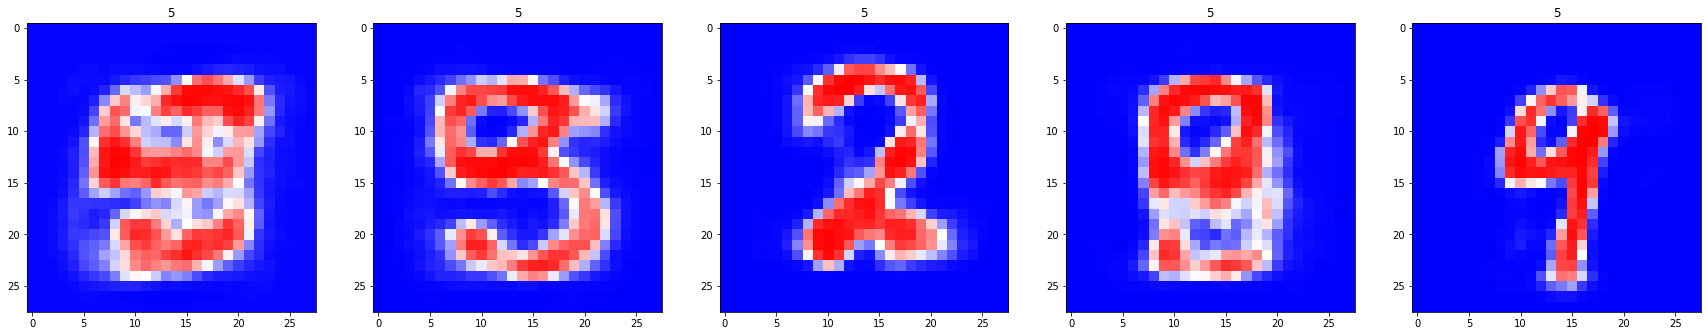

6


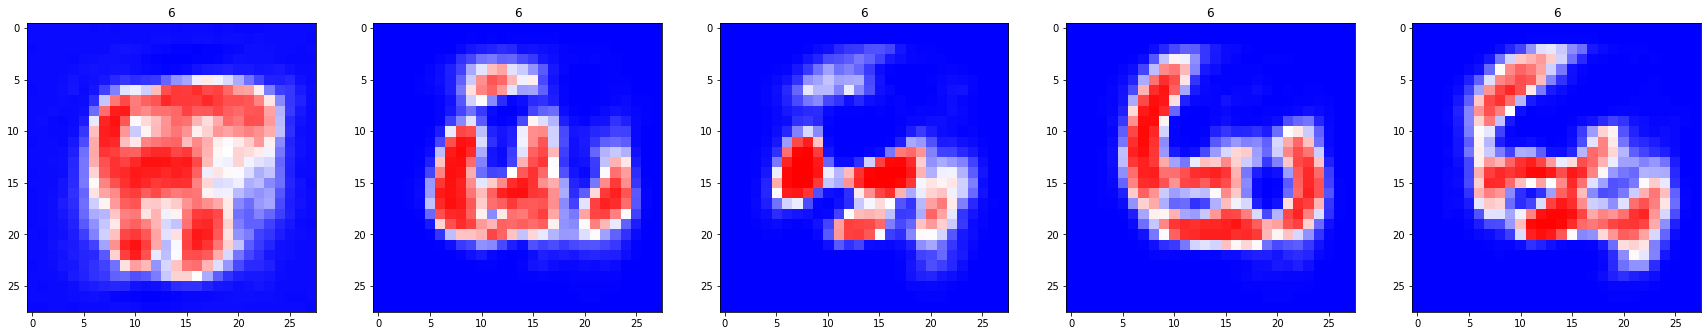

7


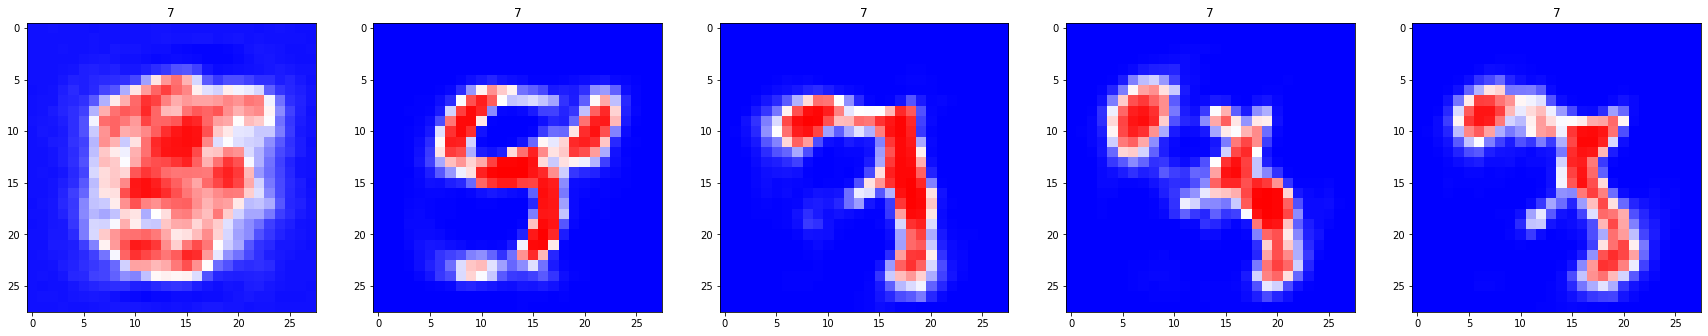

8


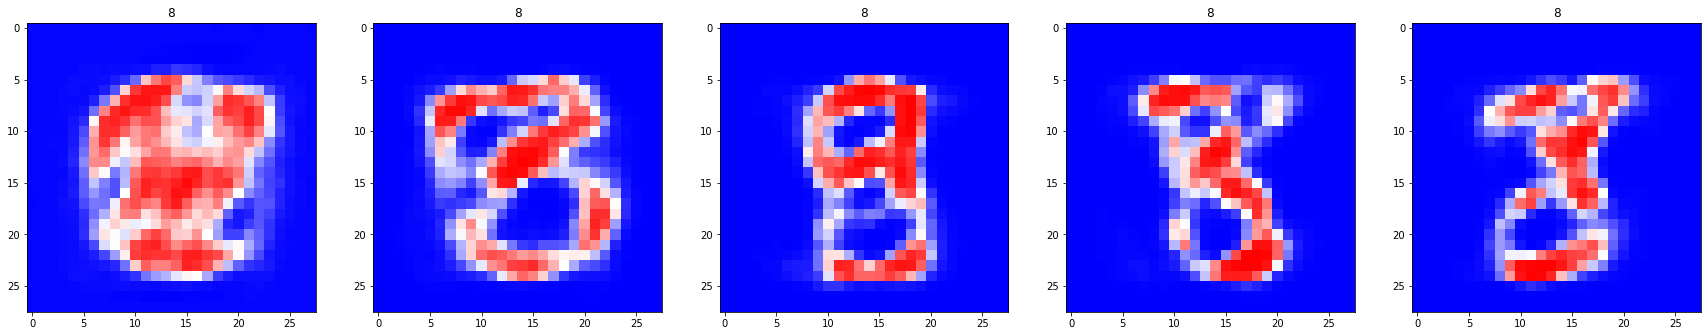

9


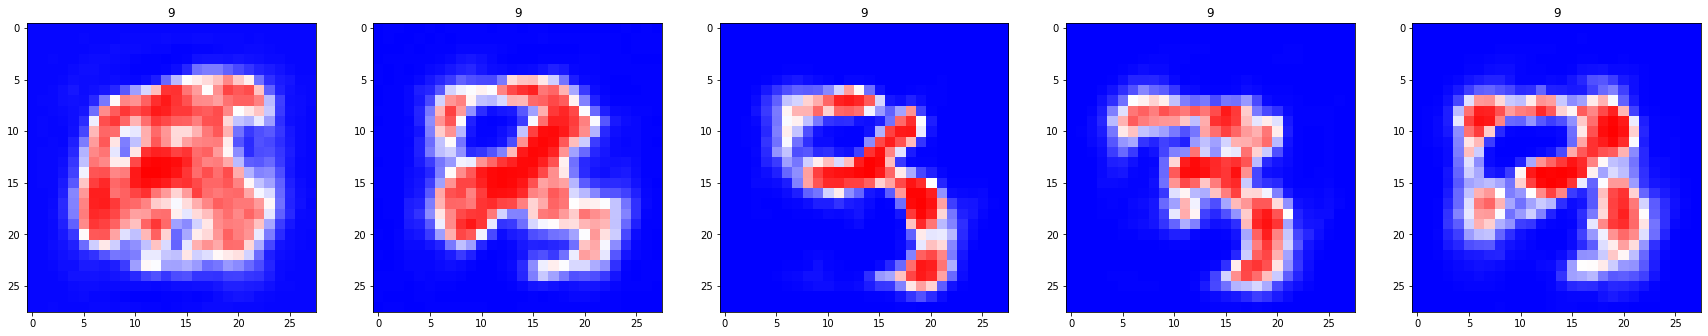

In [19]:
for digit in range(10):
    print(digit)
    digit_1hot = np.zeros(shape=(1,10))
    digit_1hot[0,digit] = 1
    dbn.generate(digit_1hot, name="dbn")

### Simpler network

In [22]:
print ("\nStarting a simple Deep Belief Net..")
n_iterations = 2500
simple_dbn = Simple_DeepBeliefNet(sizes={"vis":image_size[0]*image_size[1],  "pen":500, "top":2000, "lbl":10},
                    image_size=image_size,
                    n_labels=10,
                    batch_size=20
)
exp_time = datetime.now().strftime('%Y-%m-%d_%H-%M-%S')
simple_dbn.train_greedylayerwise(
    vis_trainset=train_imgs, 
    lbl_trainset=train_lbls, 
    n_iterations=n_iterations, 
    train_top_layer=True, 
    img_dir='two-stack/%s'%exp_time
)


Starting a simple Deep Belief Net..
loaded rbm[vis--pen] from trained_rbm_simple
loaded rbm[pen+lbl--top] from trained_rbm_simple


In [19]:
# Before Fine-tuning
print ("\n Accuracy before with pretrained networt ")
simple_dbn.recognize(train_imgs, train_lbls, k = 1)
simple_dbn.recognize(train_imgs, train_lbls, k = 15)
simple_dbn.recognize(test_imgs, test_lbls)


 Accuracy before with pretrained networt 



accuracy = 83.06%



accuracy = 83.12%



accuracy = 81.70%


In [25]:
# Fine-tuning 
print ("\n Starting fine-tuning")
simple_dbn.train_wakesleep_finetune(vis_trainset=train_imgs, lbl_trainset=train_lbls, n_iterations=2000)


 Starting fine-tuning

training wake-sleep..


In [26]:
# After fine-tuning
print ("\n Accuracy before with fine-tuned network")
simple_dbn.recognize(train_imgs, train_lbls, k = 1)
simple_dbn.recognize(train_imgs, train_lbls, k = 15)
simple_dbn.recognize(test_imgs, test_lbls) 


 Accuracy before with fine-tuned network



accuracy = 82.60%



accuracy = 82.32%



accuracy = 81.17%


0


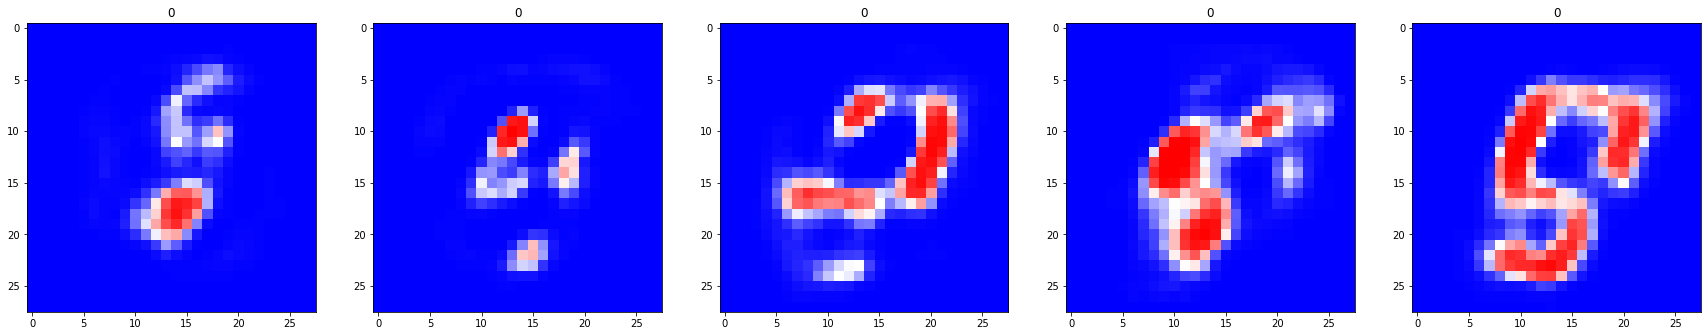

1


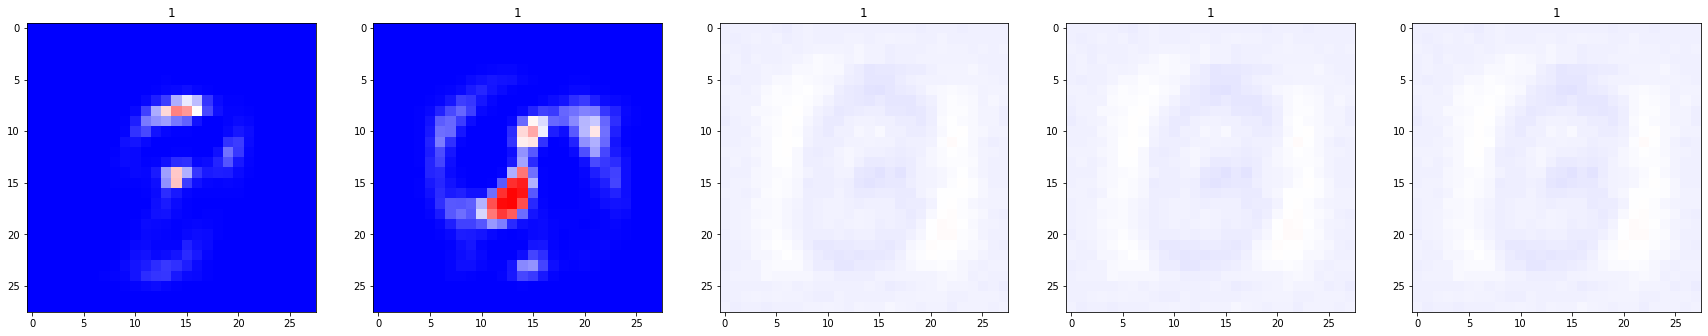

2


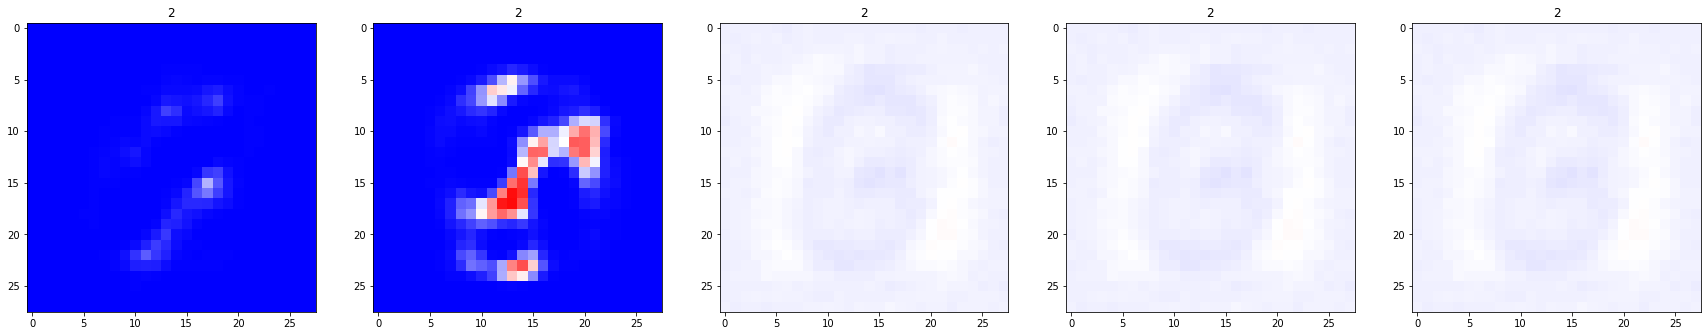

3


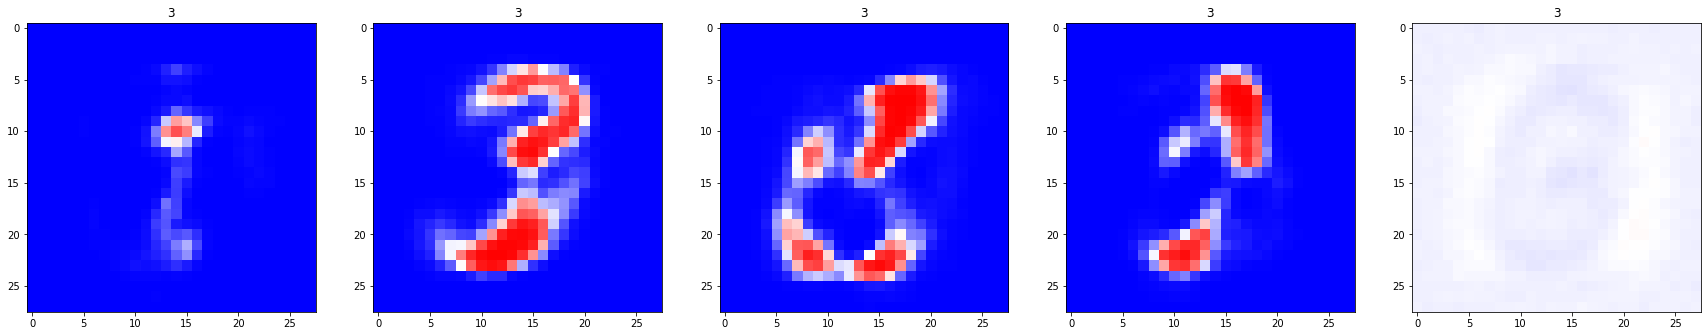

4


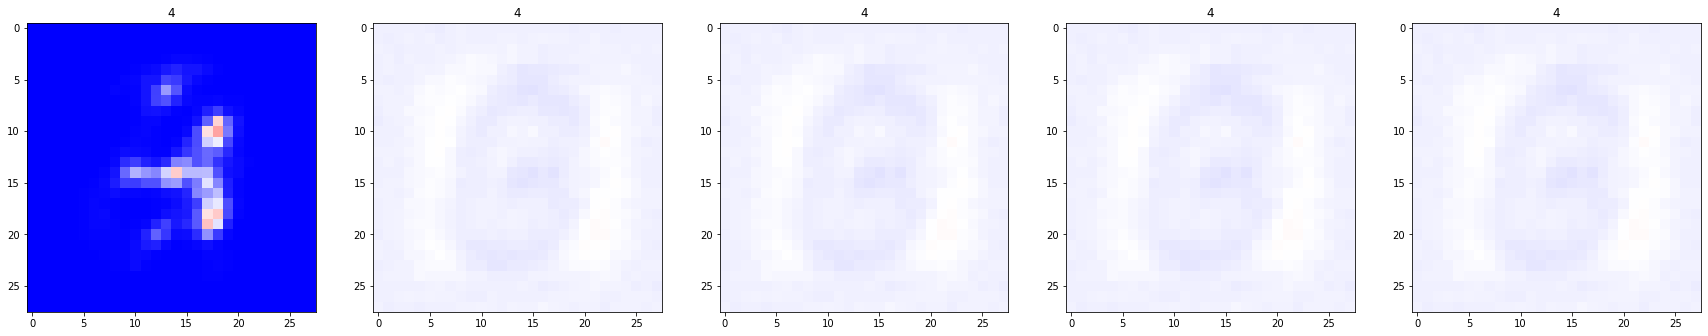

5


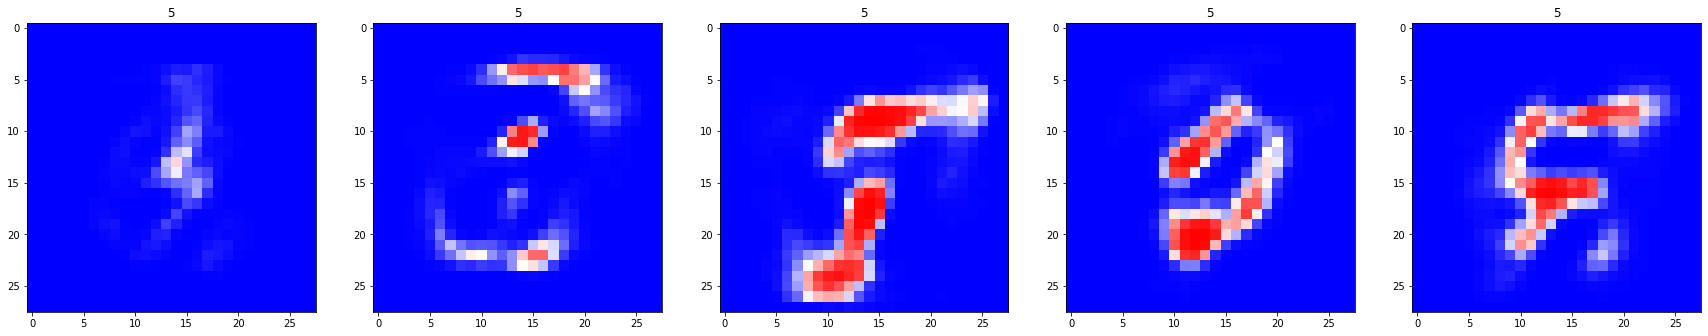

6


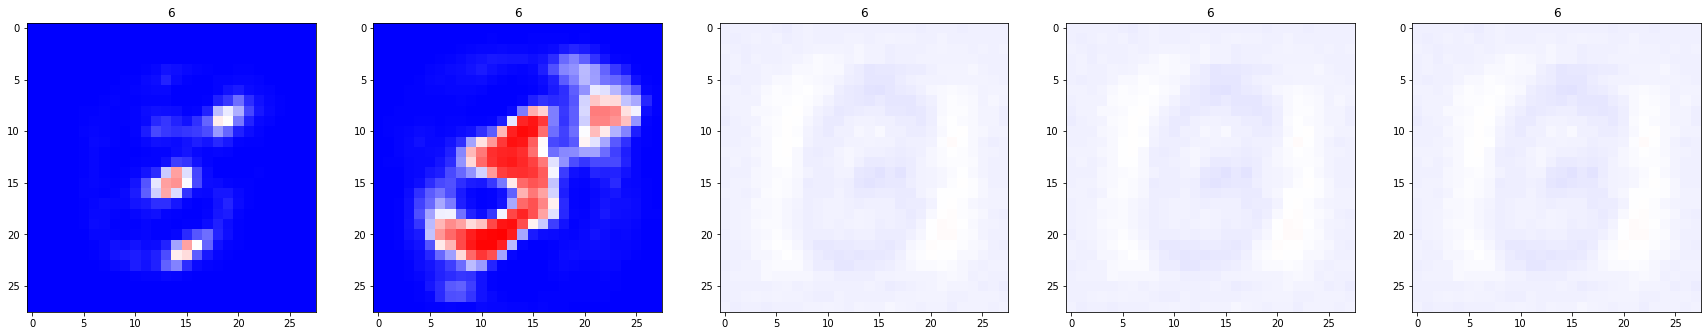

7


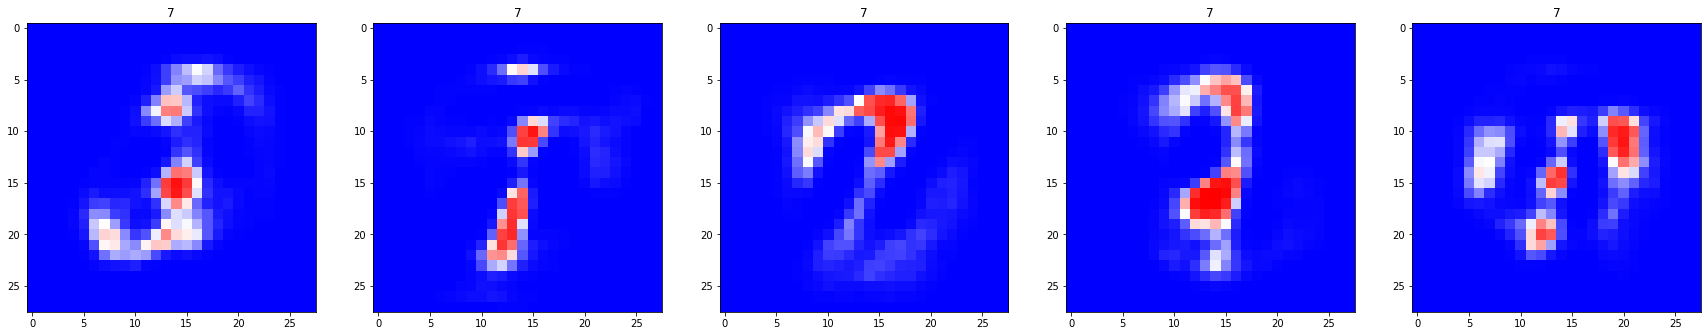

8


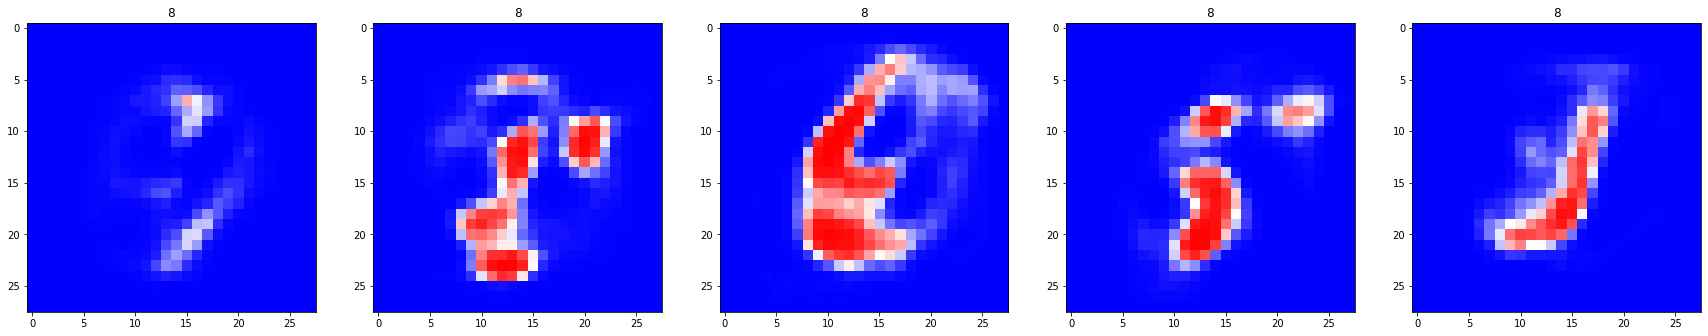

9


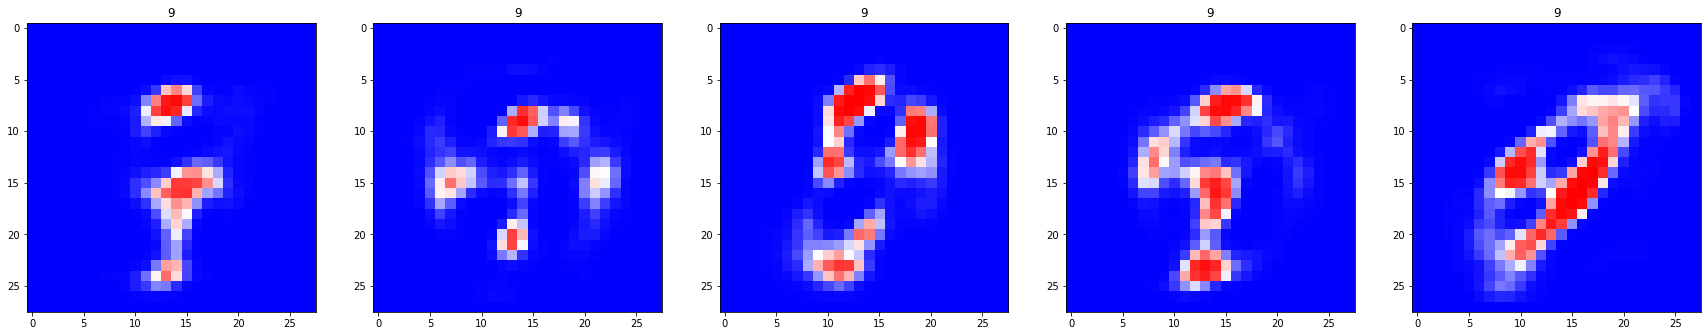

In [27]:
for digit in range(10):
    print(digit)
    digit_1hot = np.zeros(shape=(1,10))
    digit_1hot[0,digit] = 1
    simple_dbn.generate(digit_1hot, name="dbn")